<a href="https://colab.research.google.com/github/pdizdar/stock_price_comparision/blob/master/colab_moment_stock_data.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Today's at the moment stock data analysis

This notebook looks at today's at the moment stock data, to find the top five largest stocks by
3 month average volume for a particular time. Use yfinance to get information about each of those stocks, and
use data visualization to see how each of those stocks is performing for the past year. The goal
is to check to see when the stock had it's highest and lowest price. Looking at one of those five
stocks for a period of one year, this notebook shows the closing and opening price from the last
time the data was scrapped, and goes back daily for one year.

**Dates and times are subject to the stock trading calendar.**


Using  yfinance, which is built in on yahoo finance API for analysis, and for visualization plotly is used to create interactive graphs of the data.

In [1]:
import yfinance as yf
import pandas as pd
import datetime
import matplotlib.pyplot as plt
import plotly.express as px


# to print current time and a day of the week and formatted
date = pd.Timestamp(datetime.datetime.today())
today = f"{date.day_name()} {date.strftime('%m-%d-%y %H:%M:%S')} "
today
#print(f"Today is {today.day_name()} {today.strftime('%m-%d-%y %H:%M:%S')} ")



'Thursday 03-30-23 03:34:52 '

A function is created to change 'M', 'B', 'T' to its corresponding 10^n and changing the data type

In [2]:
def convert_scale(x):
    if type(x) == float or type(x) == int:
        return x
    if 'M' in x:
        if len(x) > 1:
            return float(x.replace('M', '')) * 1000000
        return 1000.0
    elif 'B' in x:
        if len(x) > 1:
            return float(x.replace('B', '')) * 1000000000
        return 1000000.0
    elif 'T' in x:
        return float(x.replace('T', '')) * 1000000000000
    else:
        return float(x)

## Feature 1: Loading Data
As per the requirement, two datasets are to be loaded in. Pandas .read_html function is used to read in HTML tables into a list of Dataframe objects. Tables are read in from https://finance.yahoo.com/. From there, most-active, gainers and losers tables are webscrapped.

The default filters used on the links.
1. most-active
    Region: United States, Market Cap (Intraday): Mid Cap and Large Cap and Mega Cap, Volume:greater than 5000000
2. gainers
    % Change in Price (Intraday):greater than 3, Region: United States, Market Cap (Intraday): Mid Cap and Large Cap and Mega Cap, Volume:greater than 15000
3. losers
    % Change in Price (Intraday):less than -2.5, Region: United States, Market Cap (Intraday): Mid Cap and Large Cap and Mega Cap, Volume:greater than 20000

Pandas module was imported.
Using the read_html() method and passing the URL, results in get all the HTML tables from the website. The read_html() method returns a list.
Now that there is a list holding the tables, in order to access the first element in the list, pass the data as an argument to the Pandas Dataframe() method to create new dataset. 

In [3]:
# reading in from a website and getting only the 1st page
most_active = pd.read_html('https://finance.yahoo.com/most-active')[0]
print(most_active.shape) #shows the shape of table
most_active.head() #print first 5 rows


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,TSLA,"Tesla, Inc.",193.88,4.69,+2.48%,123.66M,175.866M,613.456B,54.16,NaN
1,INTC,Intel Corporation,31.52,2.23,+7.61%,85.556M,46.412M,130.398B,16.25,NaN
2,FRC,First Republic Bank,14.26,0.76,+5.63%,62.634M,29.682M,2.655B,1.73,NaN
3,NIO,NIO Inc.,9.83,0.63,+6.85%,55.921M,45.234M,16.421B,NaN,NaN
4,CCL,Carnival Corporation & plc,9.89,0.56,+6.00%,54.936M,40.989M,13.658B,NaN,NaN


In [4]:
# reading in 2nd table
gainers = pd.read_html('https://finance.yahoo.com/gainers')[0]
print(gainers.shape)
gainers.head()


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,ENVX,Enovix Corporation,13.65,2.41,+21.44%,17.098M,5.088M,2.154B,NaN,NaN
1,BBIO,"BridgeBio Pharma, Inc.",17.56,2.53,+16.83%,11.671M,3.123M,2.813B,NaN,NaN
2,MSTR,MicroStrategy Incorporated,284.03,35.77,+14.41%,1.011M,714561,4.191B,NaN,NaN
3,LULU,Lululemon Athletica Inc.,361.04,40.73,+12.72%,11.502M,2.001M,46.038B,38.21,NaN
4,RLX,RLX Technology Inc.,2.58,0.29,+12.66%,16.925M,10.469M,3.994B,17.20,NaN


In [5]:
# reading in 3rd table
losers = pd.read_html('https://finance.yahoo.com/losers')[0]
print(losers.shape)
losers.head()


(25, 10)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,CTPZY,CTEEP - Companhia de Transmissão de Energia El...,4.20,-0.95,-18.45%,63892,1486,2.767B,4.38,NaN
1,UNF,UniFirst Corporation,173.02,-20.12,-10.42%,221230,79116,3.234B,31.46,NaN
2,AMKBY,A.P. Møller - Mærsk A/S,8.64,-0.77,-8.21%,932103,198121,29.948B,1.08,NaN
3,PRGS,Progress Software Corporation,55.77,-2.88,-4.91%,1.174M,341310,2.417B,25.94,NaN
4,DQ,Daqo New Energy Corp.,46.75,-2.34,-4.77%,1.541M,1.349M,3.505B,1.98,NaN


## Feature 2: Clean and operate on the data while combining them.


The concat() function was used to combine multiple datasets to create a new one. Concat
function stacks the dataset on top of each other. Then analysis can be performed on the new
combined dataset. To have a continuous index the 'ignore_index=True' parameter was used. A
custom function that converts 'M', 'B', and 'T' into corresponding 10^n values was used. The
fillna() function was used to replace Nan values with 0. The drop() function was used to delete a
column.

In [6]:
# joining 3 datasets into 1 dataframe.
stocks_df = pd.concat([most_active, gainers, losers],  ignore_index=True)
print(stocks_df.shape) # shows shape of new dataframe
print(f'Datatype before the change \n ')
stocks_df.info() 
stocks_df.head() # prints top 5 rows



(75, 10)
Datatype before the change 
 
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 75 entries, 0 to 74
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     object 
 5   Volume             75 non-null     object 
 6   Avg Vol (3 month)  75 non-null     object 
 7   Market Cap         75 non-null     object 
 8   PE Ratio (TTM)     42 non-null     float64
 9   52 Week Range      0 non-null      float64
dtypes: float64(4), object(6)
memory usage: 6.0+ KB


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM),52 Week Range
0,TSLA,"Tesla, Inc.",193.88,4.69,+2.48%,123.66M,175.866M,613.456B,54.16,NaN
1,INTC,Intel Corporation,31.52,2.23,+7.61%,85.556M,46.412M,130.398B,16.25,NaN
2,FRC,First Republic Bank,14.26,0.76,+5.63%,62.634M,29.682M,2.655B,1.73,NaN
3,NIO,NIO Inc.,9.83,0.63,+6.85%,55.921M,45.234M,16.421B,NaN,NaN
4,CCL,Carnival Corporation & plc,9.89,0.56,+6.00%,54.936M,40.989M,13.658B,NaN,NaN


The dropna() function was used to remove the '52 Week Range' column, which consists of NaN
values. Replaced NaN values with 0's using the fillna() function in the 'PE Ratio (TTM)' column.
The apply(convert_scale) function was used to convert the scale, change the datatypes from
object to float64 for 'Volume', 'Avg Vol (3 month)', 'Market Cap' columns. Lastly, the % was
changed to ' ' with a regex=True param. The dataype for '% Change' column was changed using
pandas to_numeric function.

In [7]:
# fill in 0 for NaN values 
stocks_df[['PE Ratio (TTM)', 'Avg Vol (3 month)']] = stocks_df[['PE Ratio (TTM)', 'Avg Vol (3 month)']].fillna(0) # fill in 0 where NaN
stocks_df.dropna(axis=1, thresh=9, inplace=True) # drop a column

#using .apply function to convert the scale n datatypes
stocks_df['Volume'] = stocks_df['Volume'].apply(convert_scale) 
stocks_df['Avg Vol (3 month)'] = stocks_df['Avg Vol (3 month)'].apply(convert_scale)
stocks_df['Market Cap'] = stocks_df['Market Cap'].apply(convert_scale)

# replacing %:'' and changing the dtype of column
stocks_df['% Change'] = pd.to_numeric(stocks_df['% Change'].replace({'%' : ''}, regex=True))
stocks_df.sort_values('Symbol', inplace=True) # sorting the rows in alphabetical order.

print(stocks_df.shape)
print(f'Datatypes after the change: \n') 
stocks_df.info() # shows all the columns, non null count and dtypes
stocks_df.head()

(75, 9)
Datatypes after the change: 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 75 entries, 12 to 37
Data columns (total 9 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Symbol             75 non-null     object 
 1   Name               75 non-null     object 
 2   Price (Intraday)   75 non-null     float64
 3   Change             75 non-null     float64
 4   % Change           75 non-null     float64
 5   Volume             75 non-null     float64
 6   Avg Vol (3 month)  75 non-null     float64
 7   Market Cap         75 non-null     float64
 8   PE Ratio (TTM)     75 non-null     float64
dtypes: float64(7), object(2)
memory usage: 5.9+ KB


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
12,AAPL,Apple Inc.,160.77,3.12,1.98,48914000.0,69210000.0,2.544000e+12,27.25
55,ACLLY,Accelleron Industries AG,22.70,-0.95,-4.02,173470.0,15363.0,2.151000e+09,0.00
31,AFRM,"Affirm Holdings, Inc.",10.50,1.03,10.88,16388000.0,19563000.0,3.087000e+09,0.00
69,AMC,"AMC Entertainment Holdings, Inc.",5.00,-0.15,-2.91,26839000.0,36014000.0,2.567000e+09,0.00
23,AMC,"AMC Entertainment Holdings, Inc.",5.00,-0.15,-2.91,26839000.0,36014000.0,2.567000e+09,0.00


The pandas concat() function stacks data sets on top of each other. Collecting most_active,
gainers and losers stocks, most_active stocks could be a gainer or a loser for any given day.
Thus, the duplicated() function was used to check for any duplicate rows then drop_duplicates deletes the duplicated row/s.

In [8]:
# find if there are any duplicated rows referencing column Symbol

duplicate = stocks_df[stocks_df.duplicated('Symbol')]
duplicate

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
23,AMC,"AMC Entertainment Holdings, Inc.",5.00,-0.15,-2.91,26839000.0,36014000.0,2.567000e+09,0.00
42,INTC,Intel Corporation,31.52,2.23,7.61,85556000.0,46412000.0,1.303980e+11,16.25
7,MU,"Micron Technology, Inc.",63.54,4.26,7.19,51854000.0,14917000.0,7.431600e+10,11.49
35,RIVN,"Rivian Automotive, Inc.",14.24,1.28,9.88,34237000.0,32084000.0,1.258000e+10,0.00
37,XPEV,XPeng Inc.,11.19,0.94,9.17,27284000.0,16684000.0,9.632000e+09,0.00


In [9]:
# if there is any duplicates drop_duplicates function will delete the rows, 
# keep='last' param keeps the last occurence and drops anything else. 
# inplace= True would replace the original df 
stocks_df.drop_duplicates(subset=['Symbol'], keep='last', inplace=True, ignore_index=True) 
print(stocks_df.shape) # prints updated shape of df

pd.set_option('display.max_rows', None) # displays all the rows
stocks_df # dispalys all the rows in a df


(70, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
0,AAPL,Apple Inc.,160.7700,3.1200,1.98,48914000.0,69210000.0,2.544000e+12,27.25
1,ACLLY,Accelleron Industries AG,22.7000,-0.9500,-4.02,173470.0,15363.0,2.151000e+09,0.00
2,AFRM,"Affirm Holdings, Inc.",10.5000,1.0300,10.88,16388000.0,19563000.0,3.087000e+09,0.00
3,AMC,"AMC Entertainment Holdings, Inc.",5.0000,-0.1500,-2.91,26839000.0,36014000.0,2.567000e+09,0.00
4,AMD,"Advanced Micro Devices, Inc.",96.0900,1.5300,1.62,55326000.0,62794000.0,1.548380e+11,117.18
5,AMKBY,A.P. Møller - Mærsk A/S,8.6400,-0.7700,-8.21,932103.0,198121.0,2.994800e+10,1.08
6,AMZN,"Amazon.com, Inc.",100.2500,3.0100,3.10,49657000.0,68774000.0,1.027000e+12,0.00
7,APP,AppLovin Corporation,14.9800,1.0100,7.23,2726000.0,3035000.0,5.639000e+09,0.00
8,BABA,Alibaba Group Holding Limited,99.9200,1.5200,1.54,53236000.0,23688000.0,2.585430e+11,48.04
9,BAC,Bank of America Corporation,28.6700,0.5500,1.96,59532000.0,56044000.0,2.293390e+11,8.99


## Feature 2.1 Data Analysis:



Important Note: Each time the code is run, new stocks could be present because the code webscrapes from the website using .read_html. During trading hours, most active, gainers and losers change over time. As a result, some of the queries might not be displaying any results. 

       Price (Intraday)     Change   % Change        Volume  \
count         70.000000  70.000000  70.000000  7.000000e+01   
mean          44.621600   1.432831   2.653571  1.865995e+07   
std           69.511117   7.055771   6.879333  2.490715e+07   
min            0.007200 -20.120000 -18.450000  1.521500e+04   
25%            9.105000  -0.360000  -2.970000  7.877795e+05   
50%           16.560000   0.275000   1.985000  3.759000e+06   
75%           47.462500   1.527500   7.552500  3.160025e+07   
max          361.040000  40.730000  21.440000  1.236600e+08   

       Avg Vol (3 month)    Market Cap  PE Ratio (TTM)  
count       7.000000e+01  7.000000e+01       70.000000  
mean        1.776148e+07  1.312766e+11       16.791000  
std         2.818531e+07  3.954653e+11       30.536196  
min         3.470000e+02  2.028000e+09        0.000000  
25%         3.518275e+05  3.123750e+09        0.000000  
50%         3.052500e+06  5.666500e+09        3.665000  
75%         3.148350e+07  2.44342

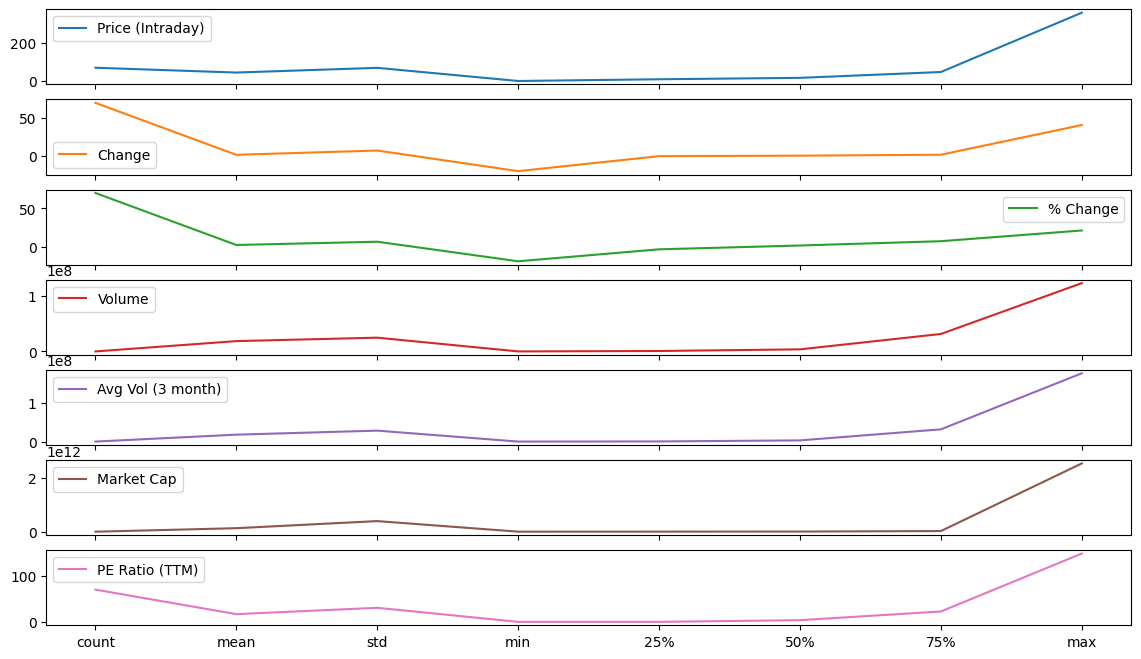

In [10]:
# describe method displays the basic statistical values
stocks_df.describe().plot(subplots=True, figsize=(14,8))
print(stocks_df.describe())

1. Find all rows that have 'Ban' in its name column?

At the time of this data analysis, bank stocks are the most active and volatile. Some banks use
'Banc, while others use 'Bank', therefore 'Ban' was used as the search term.

In [11]:
# find all rows that have 'Ban' in its name column?
stocks_df.loc[stocks_df.Name.str.contains('(?i)Ban', regex=True)]

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
9,BAC,Bank of America Corporation,28.67,0.55,1.96,59532000.0,56044000.0,2.293390e+11,8.99
10,BBD,Banco Bradesco S.A.,2.52,0.01,0.40,46443000.0,36882000.0,2.681800e+10,7.00
15,CIBEY,Commercial International Bank (Egypt) S.A.E,1.31,0.09,7.38,53904.0,189315.0,5.074000e+09,8.73
26,FRC,First Republic Bank,14.26,0.76,5.63,62634000.0,29682000.0,2.655000e+09,1.73
48,NYCB-PA,"New York Community Bancorp, Inc.",23.00,2.14,10.26,333736.0,100082.0,3.932000e+09,18.87
51,OVCHY,Oversea-Chinese Banking Corporation Limited,18.36,-0.63,-3.32,39787.0,22701.0,4.140400e+10,9.92


2. Get all the rows where volume is at least 20 million and the daily change is at least -5?

In [12]:
volume_change = stocks_df.query('Volume >= 20000000 and Change <= -5')[['Name', 'Change', 'Volume']]
volume_change

,Name,Change,Volume


3. Find stocks that dropped below 25% and print its symbol, name and % Change ?

In [13]:
stocks_below_25 = stocks_df.query('`% Change` < -25')[['Symbol', 'Name', '% Change']]
stocks_below_25

,Symbol,Name,% Change


4. Any stocks that performed over 10% today and how many times they transacted today?

In [14]:
stocks_above_20 = stocks_df.query('`% Change` > 10')[['Symbol', 'Name', '% Change', 'Volume']]
stocks_above_20

,Symbol,Name,% Change,Volume
2,AFRM,"Affirm Holdings, Inc.",10.88,16388000.0
11,BBIO,"BridgeBio Pharma, Inc.",16.83,11671000.0
22,ENVX,Enovix Corporation,21.44,17098000.0
32,GSAT,"Globalstar, Inc.",10.89,5981000.0
37,LKNCY,Luckin Coffee Inc.,10.41,1994000.0
38,LULU,Lululemon Athletica Inc.,12.72,11502000.0
41,MSTR,MicroStrategy Incorporated,14.41,1011000.0
48,NYCB-PA,"New York Community Bancorp, Inc.",10.26,333736.0
58,RLX,RLX Technology Inc.,12.66,16925000.0


5. Find a company that starts with "S", has a PE Ratio greater than or equal to 5 and the difference is less than or equal to 5?

In [15]:

Symbol_s = stocks_df.loc[(stocks_df['PE Ratio (TTM)']>=5) & (stocks_df['Change']<= 5) & (stocks_df['Symbol'].str.startswith('S')),['Symbol', 'Name', 'Change', 'PE Ratio (TTM)']]
Symbol_s

,Symbol,Name,Change,PE Ratio (TTM)
62,SPWR,SunPower Corporation,0.87,22.53


6. Is there any company that has Market Cap of 100 Billion or more? print only name and market cap.

In order to filter a DataFrame column that has spaces with the query method, we wrap the column using backticks. While this may not look great, it does allow us to use any column in the method.


In [16]:
large_market_cap = stocks_df.query("`Market Cap` > 100000000000")[['Name', 'Market Cap']]
#print(large_market_cap)

fig = px.bar(large_market_cap, x='Name', y='Market Cap', title='Companies valued at $100 Billion or more',)
fig.show()


7. List of companies to invest in that are less than $10 per share?

In [17]:
com_below_10 = stocks_df[stocks_df['Price (Intraday)'] <= 10]
print(com_below_10.shape)
com_below_10

(21, 9)


,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
3,AMC,"AMC Entertainment Holdings, Inc.",5.0000,-0.1500,-2.91,26839000.0,36014000.0,2.567000e+09,0.00
5,AMKBY,A.P. Møller - Mærsk A/S,8.6400,-0.7700,-8.21,932103.0,198121.0,2.994800e+10,1.08
10,BBD,Banco Bradesco S.A.,2.5200,0.0100,0.40,46443000.0,36882000.0,2.681800e+10,7.00
12,BBSEY,BB Seguridade Participações S.A.,6.3600,-0.1800,-2.68,64276.0,74750.0,1.270900e+10,10.97
13,CCL,Carnival Corporation & plc,9.8900,0.5600,6.00,54936000.0,40989000.0,1.365800e+10,0.00
14,CHKIF,China Southern Airlines Company Limited,0.6975,-0.0254,-3.52,65200.0,6300.0,1.728300e+10,0.00
15,CIBEY,Commercial International Bank (Egypt) S.A.E,1.3100,0.0900,7.38,53904.0,189315.0,5.074000e+09,8.73
16,CRCT,"Cricut, Inc.",9.4800,-0.3300,-3.36,50511.0,84433.0,2.080000e+09,35.11
17,CS,Credit Suisse Group AG,0.8773,0.0242,2.84,32081000.0,48259000.0,3.458000e+09,0.00
18,CTPZY,CTEEP - Companhia de Transmissão de Energia El...,4.2000,-0.9500,-18.45,63892.0,1486.0,2.767000e+09,4.38


## Feature 3: Visualize/Present your data.

In order to find the top five companies by 3 month Average Volume for a particular day, and see how those
stocks are performing for the past year, yfinance library was used. yfinance is a package
designed to download historical stock data from Yahoo Finance. Data is visualized using the
plotly library.

In [18]:
top_5_company = stocks_df.nlargest(5,['Avg Vol (3 month)'])
top_5_company

,Symbol,Name,Price (Intraday),Change,% Change,Volume,Avg Vol (3 month),Market Cap,PE Ratio (TTM)
66,TSLA,"Tesla, Inc.",193.88,4.69,2.48,123660000.0,175866000.0,6.134560e+11,54.16
25,F,Ford Motor Company,12.05,0.45,3.88,47719000.0,69416000.0,4.803300e+10,0.00
0,AAPL,Apple Inc.,160.77,3.12,1.98,48914000.0,69210000.0,2.544000e+12,27.25
6,AMZN,"Amazon.com, Inc.",100.25,3.01,3.10,49657000.0,68774000.0,1.027000e+12,0.00
4,AMD,"Advanced Micro Devices, Inc.",96.09,1.53,1.62,55326000.0,62794000.0,1.548380e+11,117.18


In [19]:
# taking a column and chaging it to a list
top_5_volume = (top_5_company.Symbol).to_list()
top_5_volume

['TSLA', 'F', 'AAPL', 'AMZN', 'AMD']

With the yfinance's download method, multiple ticker symbols can be downloaded at the same
time. Each time the list is generated it is passed as the file to run. Since this project is not rigid
and the data changes according to stock market performance. Data is downloaded for a one
year period, with a period of one day intervals, as the stock market is open, timezones are
ignored. To remove the 'Adjust Close Price' column, use auto_adjust=True. Dividends and splits
of stock can be downloaded by setting actions ='inline'. Which this project does not include.

In [20]:
# downloads the stock data for the list of tickers for 1y period
ticker = yf.download(top_5_volume, period='1y',interval='1d', ignore_tz=True, progress=False, auto_adjust=True )
ticker.info() # displays information about the columns
pd.set_option('display.max_columns', None) # displays all the columns with a scroll bar
ticker.head()


<class 'pandas.core.frame.DataFrame'>
DatetimeIndex: 251 entries, 2022-03-30 to 2023-03-29
Data columns (total 25 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   (Close, AAPL)   251 non-null    float64
 1   (Close, AMD)    251 non-null    float64
 2   (Close, AMZN)   251 non-null    float64
 3   (Close, F)      251 non-null    float64
 4   (Close, TSLA)   251 non-null    float64
 5   (High, AAPL)    251 non-null    float64
 6   (High, AMD)     251 non-null    float64
 7   (High, AMZN)    251 non-null    float64
 8   (High, F)       251 non-null    float64
 9   (High, TSLA)    251 non-null    float64
 10  (Low, AAPL)     251 non-null    float64
 11  (Low, AMD)      251 non-null    float64
 12  (Low, AMZN)     251 non-null    float64
 13  (Low, F)        251 non-null    float64
 14  (Low, TSLA)     251 non-null    float64
 15  (Open, AAPL)    251 non-null    float64
 16  (Open, AMD)     251 non-null    float64
 17  (Open, AMZN)    

Close                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-30  176.699615  119.220001  166.300995  15.813793  364.663330   
2022-03-31  173.558640  109.339996  162.997498  15.484147  359.200012   
2022-04-01  173.260437  108.190002  163.559998  15.246071  361.529999   
2022-04-04  177.365570  110.529999  168.346497  15.255227  381.816681   
2022-04-05  174.005920  106.820000  164.054993  14.486055  363.753326   

                  High                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-30  178.528533  125.669998  168.950500  16.170908  371.316681   
2022-03-31  176.958045  116.379997  166.494995  15.887047  367.713318   
2022-04-01  173.827012  111.419998  165.826996  15.703911  364.916656   
2022-04-04  177.415272  110.940002  168.394501  15.319324  383.303345   
2022-04-05  177.226417  110.480003  168.110504  15.218600  384.290009   

                   Low                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-30  175.636051  118.589996  165.500000  15.749696  361.333344   
2022-03-31  173.349897  109.019997  162.953506  15.108718  358.880005   
2022-04-01  170.904712  106.099998  162.319504  14.962211  355.546661   
2022-04-04  173.389655  107.029999  163.205505  14.980524  357.510010   
2022-04-05  173.369775  106.050003  163.266006  14.476899  362.433319   

                  Open                                                 \
                  AAPL         AMD        AMZN          F        TSLA   
Date                                                                    
2022-03-30  177.474918  123.040001  168.509506  16.042713  363.723328   
2022-03-31  176.769187  116.309998  166.445007  15.749695  364.856659   
2022-04-01  172.982124  110.480003  164.149506  15.575716  360.383331   
2022-04-04  173.518877  109.970001  164.125000  15.255227  363.126678   
2022-04-05  176.431231  109.690002  167.741501  15.072090  378.766663   

               Volume                                           
                 AAPL        AMD      AMZN         F      TSLA  
Date                                                            
2022-03-30   92633200   99476900  56168000  57853400  59865000  
2022-03-31  103049300  147004800  59966000  52529400  48992700  
2022-04-01   78751300  111867100  57090000  64695700  54263100  
2022-04-04   76468400   90123900  49882000  51146500  82035900  
2022-04-05   73401800   79532000  53728000  91708000  80075100

## Plotting Data


##### Plotly is an open-source, interactive data visualization library for Python that is built Plotly JavaScript Library (plotly.js) as sometimes referred to as "plotly.py". Plotly supports over 40 unique chart types covering a wide range of statistical, financial, geographic, scientific, and 3-D use-cases to create interactive web-based visualizations that can be displayed in Jupyter notebook, saved to standalone HTML files, or served as part of pure Python-built web applications using Dash.

In order to get the data for closing price, Only the Close column was selected for all five tickers. The highest and lowest Closing price is shown using .max and .min method. Then, the 1 year data is plotted on a line graph. Since it is interactive data, as the user hovers over the graph, it shows the ticker symbol, trading date and the price on that day.

In [21]:
close = ticker.Close
#print(close)
max = close.max()
print(f'The highest closing price for these companies are: \n{max}\n')
min = close.min()
print(f'The lowest closing price for these companies are: \n{min}')

fig = px.line(close, title=f"Closing Price for stocks with largest 3mth volume on {today} for the past year",) 
fig.show()

The highest closing price for these companies are: 
AAPL    177.365570
AMD     119.220001
AMZN    168.346497
F        15.813793
TSLA    381.816681
dtype: float64

The lowest closing price for these companies are: 
AAPL    124.829399
AMD      55.939999
AMZN     81.820000
F        10.194801
TSLA    108.099998
dtype: float64


In order to get the data for opening price, only the Open column was selected for all five tickers. The highest and lowest Opening price is shown using .max and .min method. Then, the 1 year data is plotted on a filled area graph. It is an interactive data, as the user hovers over the graph, it shows the ticker symbol, trading date and the price on that day.

In [22]:
open = ticker.Open
max = open.max()
print(f'The highest opening price for these companies are: \n{max}\n')
min = open.min()
print(f'The lowest opening price for these companies are: \n{min}')
px.area(open, title=f"Opening price for stocks with largest 3 mth volume on {today} for the past year")

The highest opening price for these companies are: 
AAPL    177.474918
AMD     123.040001
AMZN    168.509506
F        16.042713
TSLA    378.766663
dtype: float64

The lowest opening price for these companies are: 
AAPL    125.817904
AMD      55.520000
AMZN     82.800003
F        10.185584
TSLA    103.000000
dtype: float64


In order to get the data for high price, Only the High column was selected for all five tickers. The highest and lowest High price is shown using .max and .min method. Then, the 1 year data is plotted on a plotly bar graph. Since it is an interactive data, as the user hovers over the graph, it shows the ticker symbol, trading date and the price on that day.

In [23]:
high = ticker.High
max = high.max()
print(f'The highest high price for these companies are: \n{max}\n')
min = high.min()
print(f'The lowest high price for these companies are: \n{min}') 

figure = px.bar(high, title=f" High's for stocks with largest 3mth volume on {today} for the past year")
figure.show()

The highest high price for these companies are: 
AAPL    178.528533
AMD     125.669998
AMZN    168.950500
F        16.170908
TSLA    384.290009
dtype: float64

The lowest high price for these companies are: 
AAPL    127.575207
AMD      58.320000
AMZN     83.480003
F        10.333068
TSLA    111.750000
dtype: float64


In order to get the data for low price, Only the Low column was selected for all five tickers. The highest and lowest Low price is shown using .max and .min method. Then, the 1 year data is plotted on a scatter plot. Since it is interactive data, as the user hovers over the graph, it shows the ticker symbol, trading date and the price on that day.

In [24]:
low = ticker.Low
max = low.max()
print(f'The highest low price for these companies are: \n{max}\n')
min = low.min()
print(f'The lowest low price for these companies are: \n{min}')
figure = px.scatter(ticker.Low, title=f"Low's for stocks with largest 3mth volume on {today} for the past year")
figure.show()

The highest low price for these companies are: 
AAPL    175.636051
AMD     118.589996
AMZN    165.500000
F        15.749696
TSLA    362.433319
dtype: float64

The lowest low price for these companies are: 
AAPL    123.980696
AMD      54.570000
AMZN     81.430000
F         9.780004
TSLA    101.809998
dtype: float64


In order to get the data for volume, Only the Volume column was selected for all five tickers. .describe() method is shown to show basic statistics. Then, the 1 year data is plotted on a box plot. As the user hovers over the graph for each company, the graph will display seven different statistics, such as the maximum, median, and minimum trading volume, for a period of one year.

In [25]:
volume = ticker.Volume
print(volume.describe())

fig = px.box(volume, title=f"Trading Volume of stocks for the past year") 
fig.show()


               AAPL           AMD          AMZN             F          TSLA
count  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02  2.510000e+02
mean   8.166153e+07  8.194031e+07  7.368947e+07  6.387252e+07  1.093444e+08
std    2.377704e+07  2.850357e+07  3.053186e+07  2.475143e+07  4.965774e+07
min    3.519590e+07  2.601890e+07  3.508860e+07  1.298090e+07  4.186470e+07
25%    6.655525e+07  6.158220e+07  5.472590e+07  4.979325e+07  7.271860e+07
50%    7.646840e+07  7.902290e+07  6.560740e+07  5.867670e+07  9.264180e+07
75%    8.949255e+07  9.544705e+07  8.392465e+07  7.373620e+07  1.404976e+08
max    1.826020e+08  2.253941e+08  2.726620e+08  2.497841e+08  3.065906e+08


array([<Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>,
       <Axes: xlabel='Date'>, <Axes: xlabel='Date'>], dtype=object)

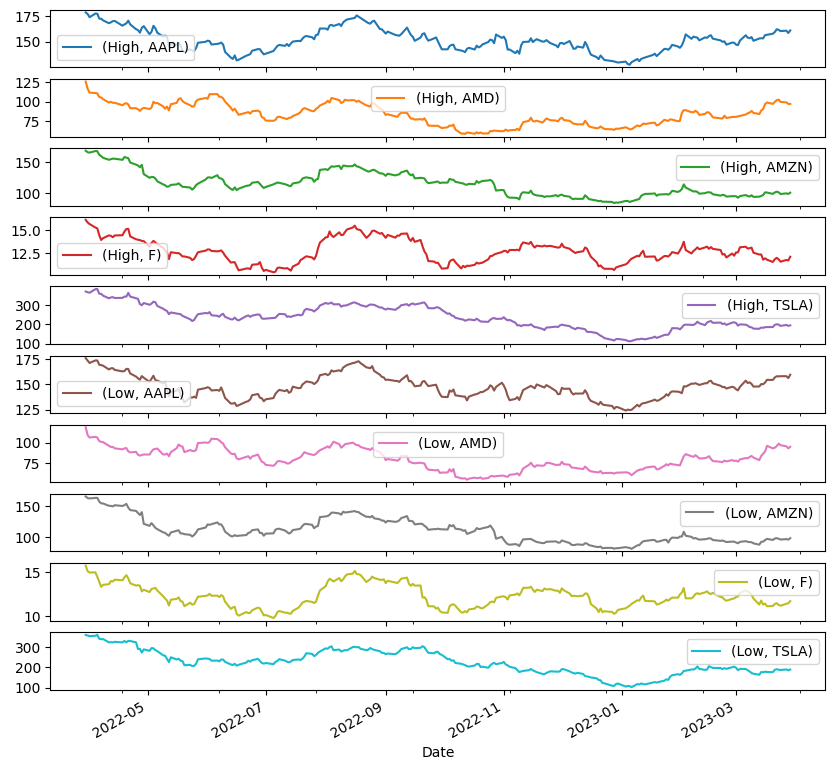

In [26]:
High_Low = ticker.loc[:, ['High', 'Low' ]]
High_Low.head()
High_Low.max()
High_Low.plot(subplots=True, figsize=(10,10))
#ax = High_Low.unstack(level=0).plot(figsize=(14,6))
